Installing Kaggle package

In [1]:
!mkdir ~/.kaggle

mkdir: /Users/stephieeh/.kaggle: File exists


In [2]:
!cp /Users/stephieeh/Downloads/kaggle.json /Users/stephieeh/.kaggle/kaggle.json

cp: /Users/stephieeh/Downloads/kaggle.json: No such file or directory


In [3]:
!cd /Users/stephieeh/.kaggle/ && ls

kaggle.json


In [4]:
!kaggle datasets list -s 'e-commerce'

ref                                                      title                                            size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------  ----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
carrie1/ecommerce-data                                   E-Commerce Data                                   7MB  2017-08-17 02:44:30         145135       1560  0.7058824        
thedevastator/unlock-profits-with-e-commerce-sales-data  E-Commerce Sales Dataset                          6MB  2022-12-03 09:27:17          36416        346  1.0              
benroshan/ecommerce-data                                 E-Commerce Data                                  18KB  2020-04-22 11:47:38          17246        122  1.0              
prachi13/customer-analytics                               E-Commerce Shipping Data                       121KB  202

Data Load

In [5]:
!kaggle datasets download -d 'gabrielramos87/an-online-shop-business' --force

100%|██████████████████████████████████████| 6.66M/6.66M [00:04<00:00, 1.56MB/s]
100%|██████████████████████████████████████| 6.66M/6.66M [00:04<00:00, 1.72MB/s]


In [6]:
!chmod 600 /Users/stephieeh/.kaggle/kaggle.json

In [7]:
# !sudo apt-get install unzip

In [8]:
!unzip an-online-shop-business.zip -d data/

Archive:  an-online-shop-business.zip
  inflating: data/Sales Transaction v.4a.csv  


In [9]:
!mv data/sales_transaction.csv data/sales.csv

mv: rename data/sales_transaction.csv to data/sales.csv: No such file or directory


In [10]:
!ls data

Sales Transaction v.4a.csv


Adding libraries 

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter, StrMethodFormatter
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
import seaborn as sns
import numpy as np
import matplotlib.font_manager as font_manager
import plotly.graph_objs as go
from plotly.offline import iplot
sns.set()
pd.options.display.max_columns = 999

In [12]:
df = pd.read_csv('data/Sales Transaction v.4a.csv')

In [13]:
df.columns

Index(['TransactionNo', 'Date', 'ProductNo', 'ProductName', 'Price',
       'Quantity', 'CustomerNo', 'Country'],
      dtype='object')

In [14]:
df.dtypes

TransactionNo     object
Date              object
ProductNo         object
ProductName       object
Price            float64
Quantity           int64
CustomerNo       float64
Country           object
dtype: object

In [15]:
df.describe()

,Price,Quantity,CustomerNo
count,536350.000000,536350.000000,536295.000000
mean,12.662182,9.919347,15227.893178
std,8.490450,216.662300,1716.582932
min,5.130000,-80995.000000,12004.000000
25%,10.990000,1.000000,13807.000000
50%,11.940000,3.000000,15152.000000
75%,14.090000,10.000000,16729.000000
max,660.620000,80995.000000,18287.000000


Data cleaning

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536350 entries, 0 to 536349
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionNo  536350 non-null  object 
 1   Date           536350 non-null  object 
 2   ProductNo      536350 non-null  object 
 3   ProductName    536350 non-null  object 
 4   Price          536350 non-null  float64
 5   Quantity       536350 non-null  int64  
 6   CustomerNo     536295 non-null  float64
 7   Country        536350 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 32.7+ MB


In [17]:
df.shape

(536350, 8)

In [18]:
df.nunique()

TransactionNo    23204
Date               305
ProductNo         3768
ProductName       3768
Price              530
Quantity           510
CustomerNo        4738
Country             38
dtype: int64

In [19]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
536345    False
536346    False
536347    False
536348    False
536349    False
Length: 536350, dtype: bool

In [20]:
df.duplicated().sum()

5200

In [21]:
# Understand why there are duplicates
# Starting with TransactionNo
df.loc[df.duplicated(subset=['TransactionNo'])]

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
2,581475,12/9/2019,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom
3,581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom
4,581475,12/9/2019,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom
5,581475,12/9/2019,21705,Bag 500g Swirly Marbles,10.65,24,13069.0,United Kingdom
6,581475,12/9/2019,22118,Joy Wooden Block Letters,11.53,18,13069.0,United Kingdom
...,...,...,...,...,...,...,...,...
536345,C536548,12/1/2018,22168,Organiser Wood Antique White,18.96,-2,12472.0,Germany
536346,C536548,12/1/2018,21218,Red Spotty Biscuit Tin,14.09,-3,12472.0,Germany
536347,C536548,12/1/2018,20957,Porcelain Hanging Bell Small,11.74,-1,12472.0,Germany
536348,C536548,12/1/2018,22580,Advent Calendar Gingham Sack,16.35,-4,12472.0,Germany


In [22]:
# Analysing one transaction number closely to understand behaviour
df.query('TransactionNo == "581475"').head(10)

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
1,581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom
2,581475,12/9/2019,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom
3,581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom
4,581475,12/9/2019,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom
5,581475,12/9/2019,21705,Bag 500g Swirly Marbles,10.65,24,13069.0,United Kingdom
6,581475,12/9/2019,22118,Joy Wooden Block Letters,11.53,18,13069.0,United Kingdom
7,581475,12/9/2019,22119,Peace Wooden Block Letters,12.25,12,13069.0,United Kingdom
8,581475,12/9/2019,22217,T-Light Holder Hanging Lace,10.65,12,13069.0,United Kingdom
9,581475,12/9/2019,22216,T-Light Holder White Lace,10.55,24,13069.0,United Kingdom
10,581475,12/9/2019,22380,Toy Tidy Spaceboy,11.06,20,13069.0,United Kingdom


In [23]:
# Adding a different TransactionNo to analyse further
df.query('TransactionNo == "C536548"').head(10)

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
536336,C536548,12/1/2018,22244,3 Hook Hanger Magic Garden,12.25,-4,12472.0,Germany
536337,C536548,12/1/2018,22242,5 Hook Hanger Magic Toadstool,11.94,-5,12472.0,Germany
536338,C536548,12/1/2018,20914,Set/5 Red Retrospot Lid Glass Bowls,13.27,-1,12472.0,Germany
536339,C536548,12/1/2018,22892,Set Of Salt And Pepper Toadstools,11.53,-7,12472.0,Germany
536340,C536548,12/1/2018,22654,Deluxe Sewing Kit,16.35,-1,12472.0,Germany
536341,C536548,12/1/2018,22333,Retrospot Party Bag + Sticker Set,11.94,-1,12472.0,Germany
536342,C536548,12/1/2018,22245,Hook 1 Hanger Magic Garden,11.12,-2,12472.0,Germany
536343,C536548,12/1/2018,22077,6 Ribbons Rustic Charm,11.94,-6,12472.0,Germany
536344,C536548,12/1/2018,22631,Circus Parade Lunch Box,12.25,-1,12472.0,Germany
536345,C536548,12/1/2018,22168,Organiser Wood Antique White,18.96,-2,12472.0,Germany


Nothing concrete to establish reasons behind duplicates

In [24]:
df.columns

Index(['TransactionNo', 'Date', 'ProductNo', 'ProductName', 'Price',
       'Quantity', 'CustomerNo', 'Country'],
      dtype='object')

In [25]:
# df.duplicated(subset=['TransactionNo','Date','ProductNo']).sum()
# inverse
# ~df.duplicated(subset=['TransactionNo','Date','ProductNo'])
# And locate where values are unique or not duplicated in these columns
# df.loc[~df.duplicated(subset=['TransactionNo','Date','ProductNo'])]\
# .reset_index(drop=True).copy()

Drop duplicates

In [26]:

df.duplicated().sum()


5200

In [27]:
df = df.drop_duplicates()

In [28]:
df.duplicated().sum()

0

In [29]:
df.head()

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
0,581482,12/9/2019,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom
1,581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom
2,581475,12/9/2019,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom
3,581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom
4,581475,12/9/2019,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom


In [30]:
df.shape

(531150, 8)

In [31]:
# identifying our null values
df.isna().sum()

TransactionNo     0
Date              0
ProductNo         0
ProductName       0
Price             0
Quantity          0
CustomerNo       55
Country           0
dtype: int64

In [32]:
df['CustomerNo'] = df['CustomerNo'].fillna(0)

In [33]:
df.isna().sum()

TransactionNo    0
Date             0
ProductNo        0
ProductName      0
Price            0
Quantity         0
CustomerNo       0
Country          0
dtype: int64

Adding an additional column to calculate total cost

In [34]:
df['Total_Cost'] = df['Quantity'] * df['Price']

In [35]:
df.head()

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country,Total_Cost
0,581482,12/9/2019,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom,257.64
1,581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom,383.40
2,581475,12/9/2019,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom,138.36
3,581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom,127.80
4,581475,12/9/2019,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom,71.64


Update datatype & separate date into different columns

In [36]:
df['Date'] = pd.to_datetime(df['Date'])
df['Price'] = pd.to_numeric(df['Price'])
df['Quantity'] = pd.to_numeric(df['Quantity'])

In [37]:
df['CustomerNo'] = df['CustomerNo'].map(int)
df['CustomerNo'] = df['CustomerNo'].map(str)

In [38]:
df['Time'] = df['Date'].dt.time
df['Month'] = df['Date'].dt.month_name()
df['Day'] = df['Date'].dt.day_name()
df['Year']= df['Date'].dt.year

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 531150 entries, 0 to 536349
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   TransactionNo  531150 non-null  object        
 1   Date           531150 non-null  datetime64[ns]
 2   ProductNo      531150 non-null  object        
 3   ProductName    531150 non-null  object        
 4   Price          531150 non-null  float64       
 5   Quantity       531150 non-null  int64         
 6   CustomerNo     531150 non-null  object        
 7   Country        531150 non-null  object        
 8   Total_Cost     531150 non-null  float64       
 9   Time           531150 non-null  object        
 10  Month          531150 non-null  object        
 11  Day            531150 non-null  object        
 12  Year           531150 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(8)
memory usage: 56.7+ MB


In [40]:
df.head()

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country,Total_Cost,Time,Month,Day,Year
0,581482,2019-12-09,22485,Set Of 2 Wooden Market Crates,21.47,12,17490,United Kingdom,257.64,00:00:00,December,Monday,2019
1,581475,2019-12-09,22596,Christmas Star Wish List Chalkboard,10.65,36,13069,United Kingdom,383.40,00:00:00,December,Monday,2019
2,581475,2019-12-09,23235,Storage Tin Vintage Leaf,11.53,12,13069,United Kingdom,138.36,00:00:00,December,Monday,2019
3,581475,2019-12-09,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069,United Kingdom,127.80,00:00:00,December,Monday,2019
4,581475,2019-12-09,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069,United Kingdom,71.64,00:00:00,December,Monday,2019


In [41]:
# Checking min amount 
df['Price'].min()

5.13

In [42]:
# Renaming columns
df.rename(columns={'TransactionNo': 'Transaction_No',
                  'ProductNo': 'Product_No',
                  'ProductName': 'Product_Name',
                  'CustomerNo': 'Customer_No'})

,Transaction_No,Date,Product_No,Product_Name,Price,Quantity,Customer_No,Country,Total_Cost,Time,Month,Day,Year
0,581482,2019-12-09,22485,Set Of 2 Wooden Market Crates,21.47,12,17490,United Kingdom,257.64,00:00:00,December,Monday,2019
1,581475,2019-12-09,22596,Christmas Star Wish List Chalkboard,10.65,36,13069,United Kingdom,383.40,00:00:00,December,Monday,2019
2,581475,2019-12-09,23235,Storage Tin Vintage Leaf,11.53,12,13069,United Kingdom,138.36,00:00:00,December,Monday,2019
3,581475,2019-12-09,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069,United Kingdom,127.80,00:00:00,December,Monday,2019
4,581475,2019-12-09,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069,United Kingdom,71.64,00:00:00,December,Monday,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
536345,C536548,2018-12-01,22168,Organiser Wood Antique White,18.96,-2,12472,Germany,-37.92,00:00:00,December,Saturday,2018
536346,C536548,2018-12-01,21218,Red Spotty Biscuit Tin,14.09,-3,12472,Germany,-42.27,00:00:00,December,Saturday,2018
536347,C536548,2018-12-01,20957,Porcelain Hanging Bell Small,11.74,-1,12472,Germany,-11.74,00:00:00,December,Saturday,2018
536348,C536548,2018-12-01,22580,Advent Calendar Gingham Sack,16.35,-4,12472,Germany,-65.40,00:00:00,December,Saturday,2018


Data Questions & Visualization

Calculate Sales Trend

In [43]:
df['Date'].value_counts()

2019-12-05    5280
2019-12-08    4897
2019-11-29    4248
2019-11-16    4091
2019-11-11    4004
              ... 
2019-03-13     522
2018-12-19     499
2019-05-01     448
2018-12-22     287
2019-02-06     272
Name: Date, Length: 305, dtype: int64

In [44]:
# Starting with getting the period month year
df['month_year']= df['Date'].apply(lambda x: x.strftime('%Y~%m'))

In [45]:
# Calculate counts of each month for values greater than 0
df_quantity = df[df['Quantity']>0]

In [46]:
df_quantity = df.groupby(['month_year'], as_index=False)['Total_Cost'].count()


In [47]:
df_quantity.columns= ['Date','Total_Cost']

In [48]:
df_quantity.head()

,Date,Total_Cost
0,2018~12,41565
1,2019~01,34530
2,2019~02,27173
3,2019~03,35932
4,2019~04,29235


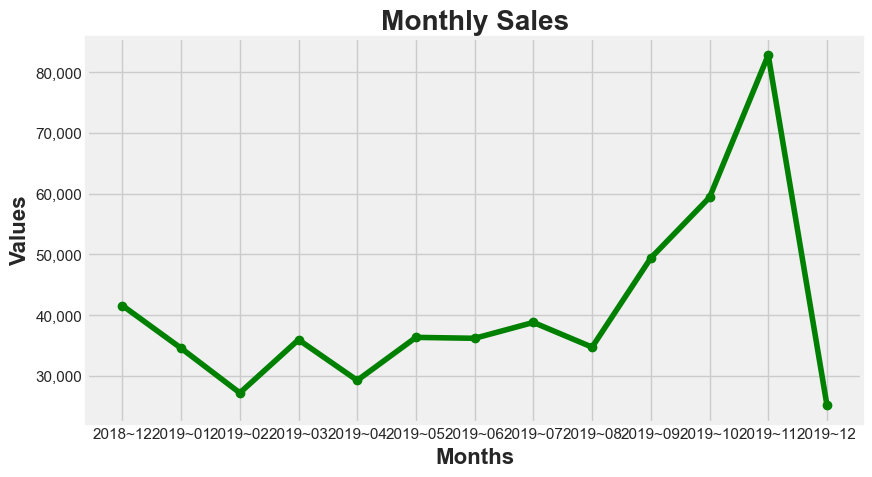

In [49]:
plt.figure(figsize=(10,5))
plt.style.use('fivethirtyeight')
plt.xlabel('Months',fontsize=16, fontweight='bold')
plt.ylabel('Values',fontsize=16, fontweight='bold')
plt.title('Monthly Sales', fontweight='bold')
plt.plot(df_quantity['Date'], df_quantity['Total_Cost'],'-o', color='green')
fmt = FuncFormatter('{:,.0f}'.format)
plt.gca().yaxis.set_major_formatter(fmt)
plt.show()

In [50]:
# Calculate sales trend over the months
df_trend_months = df.groupby(['month_year'], as_index=False)['Total_Cost'].sum()


In [51]:
df_trend_months.columns= ['Date', 'Total_Cost']
df_trend_months.head()

,Date,Total_Cost
0,2018~12,4217196.99
1,2019~01,3638085.05
2,2019~02,3291955.62
3,2019~03,4339649.36
4,2019~04,3405988.90


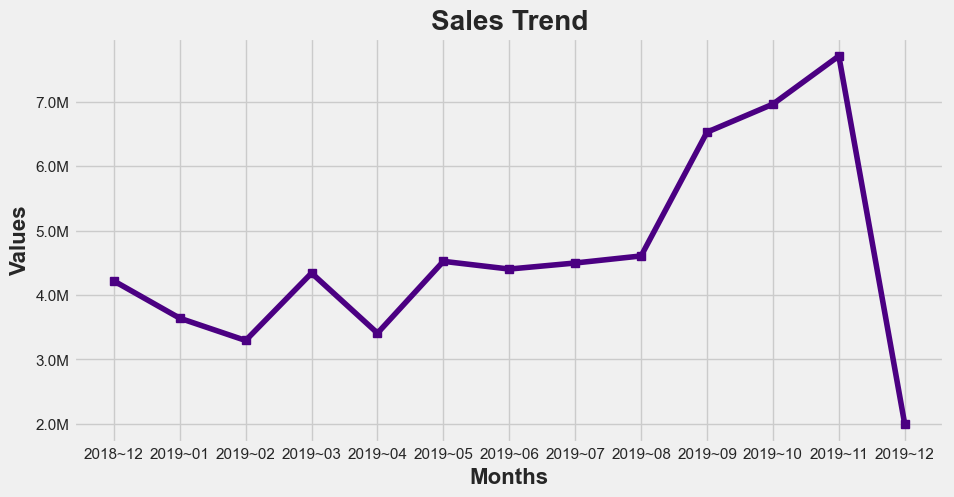

In [52]:
def millions(y, pos):
    return '%1.1fM' % (y*1e-6)
formatter = FuncFormatter(millions)
fig, ax = plt.subplots(figsize=(10,5))
ax.yaxis.set_major_formatter(formatter)
ax.set_ylabel('Values',fontsize=16, fontweight='bold')
ax.set_xlabel('Months',fontsize=16, fontweight='bold')
ax.set_title('Sales Trend', fontweight='bold')
plt.plot(df_trend_months['Date'], df_trend_months['Total_Cost'],'-s', color='indigo')
plt.show()

A huge sales jump starting after August 2019, reaching its highest peak in November 2019 when the holiday shopping season kicks off. It also explains why there's fewer sales movements between December 18 and summer 19 as festivals would have passed and sales returned to normal where shopping habits decrease with fewer consumer demands. The lowest data recorded is in December 19 but it's unclear if this is due to limited datasets or simply a decrease in sales. But nevertheless, it's fair to say the two graphs show sales growth over the year.

Top product names by Sales

In [53]:
df.columns

Index(['TransactionNo', 'Date', 'ProductNo', 'ProductName', 'Price',
       'Quantity', 'CustomerNo', 'Country', 'Total_Cost', 'Time', 'Month',
       'Day', 'Year', 'month_year'],
      dtype='object')

In [54]:
product_names = df.groupby(['ProductName'], as_index=False)['Total_Cost'].sum()


In [55]:
product_names = product_names.sort_values('Total_Cost', ascending = False).head(10)


In [56]:
# To avoid seeing all product names, only fetch the top 5 by Sales
product_names = product_names[:5]

In [57]:
product_names.head()

,ProductName,Total_Cost
2489,Popcorn Holder,583075.23
3685,World War 2 Gliders Asstd Designs,556157.63
2210,Paper Craft Little Birdie,501359.05
828,Cream Hanging Heart T-Light Holder,451163.73
204,Assorted Colour Bird Ornament,419557.68


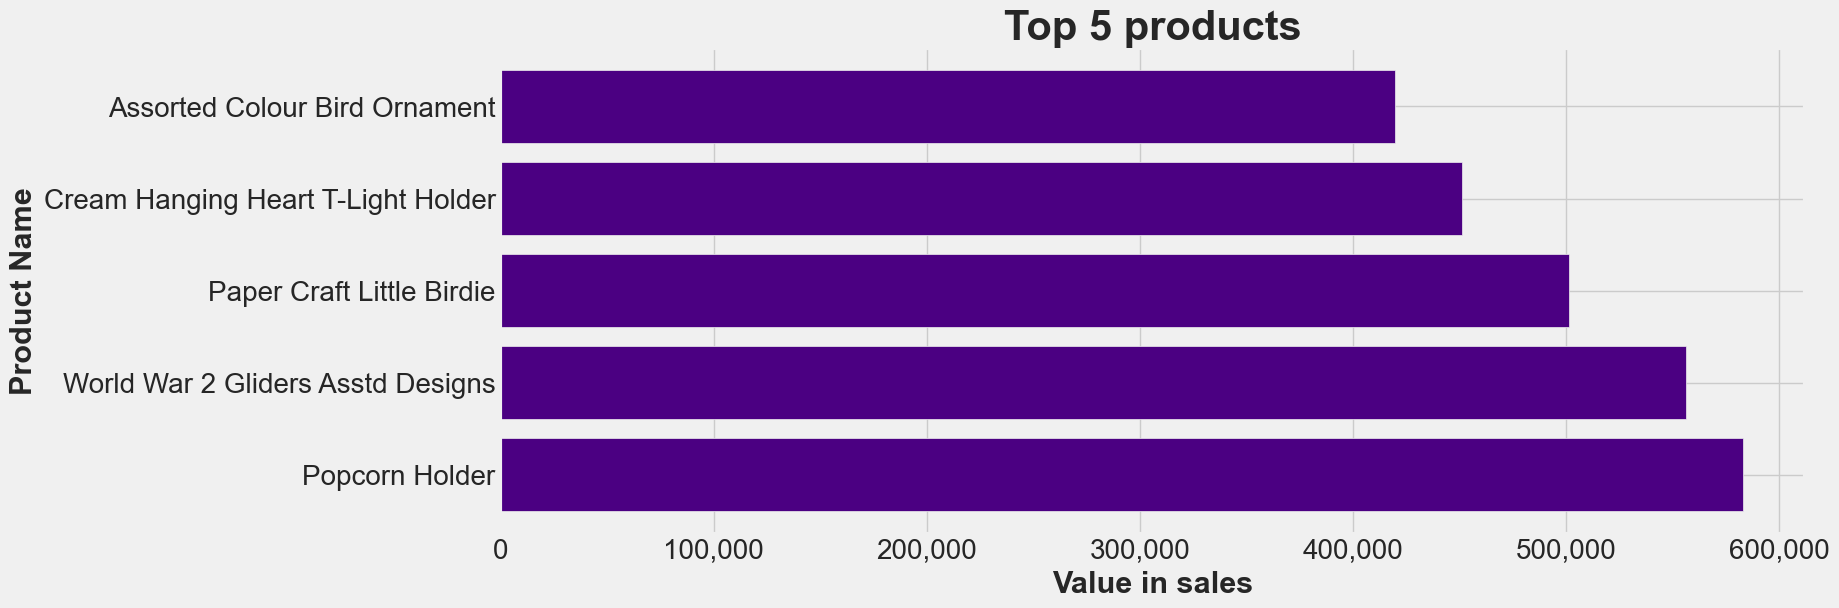

In [58]:
plt.figure(figsize=(15,6))
plt.style.use('fivethirtyeight')
plt.xticks(rotation='horizontal', size=20)
plt.yticks(size=20)
plt.xlabel('Value in sales',fontsize=22, fontweight='bold')
plt.ylabel('Product Name', fontsize=22, fontweight='bold')
plt.title('Top 5 products',fontsize=30, fontweight='bold')
plt.barh(product_names['ProductName'], product_names['Total_Cost'], color='indigo')
fmt = FuncFormatter('{:,.0f}'.format)
plt.gca().xaxis.set_major_formatter(fmt)
plt.show()

Top 5 products by quantity

In [59]:
products_sold = df.groupby(['ProductName'], as_index=False)['Quantity'].sum()


In [60]:
products_sold = products_sold.sort_values('Quantity', ascending = False).head()


In [61]:
products_sold = products_sold[:5]

In [62]:
products_sold.head()

,ProductName,Quantity
2489,Popcorn Holder,56431
3685,World War 2 Gliders Asstd Designs,53751
1679,Jumbo Bag Red Retrospot,47260
204,Assorted Colour Bird Ornament,36346
2164,Pack Of 72 Retrospot Cake Cases,36208


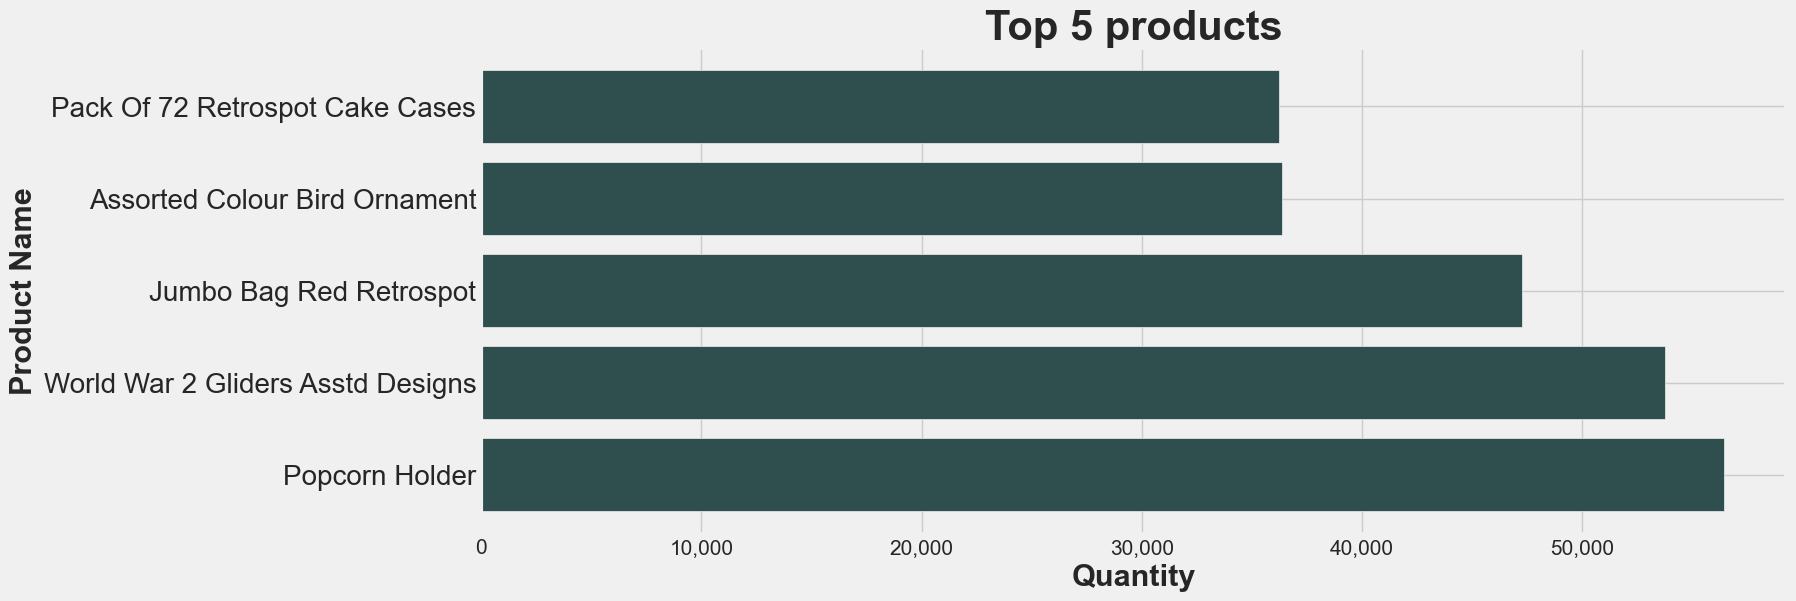

In [63]:
plt.figure(figsize=(15,6))
plt.style.use('fivethirtyeight')
plt.xticks(rotation='horizontal', size=15)
plt.yticks(size=20)
plt.xlabel('Quantity',fontsize=22, fontweight='bold')
plt.ylabel('Product Name',fontsize=22, fontweight='bold')
plt.title('Top 5 products', fontsize=30, fontweight='bold')
plt.barh(products_sold ['ProductName'], products_sold['Quantity'], color='darkslategrey')
fmt = FuncFormatter('{:,.0f}'.format)
plt.gca().xaxis.set_major_formatter(fmt)
plt.show()

Countries with most sales

In [64]:
topcountries_sales= df.groupby(['Country'], as_index=False)['Total_Cost'].sum()


In [65]:
topcountries_sales = topcountries_sales.sort_values('Total_Cost', ascending = False)


In [66]:
topcountries_sales = topcountries_sales[:5]

In [67]:
topcountries_sales.head()

,Country,Total_Cost
36,United Kingdom,49837557.96
24,Netherlands,2147811.39
10,EIRE,1659053.51
14,Germany,1348561.75
13,France,1316144.75


<function matplotlib.pyplot.show(close=None, block=None)>

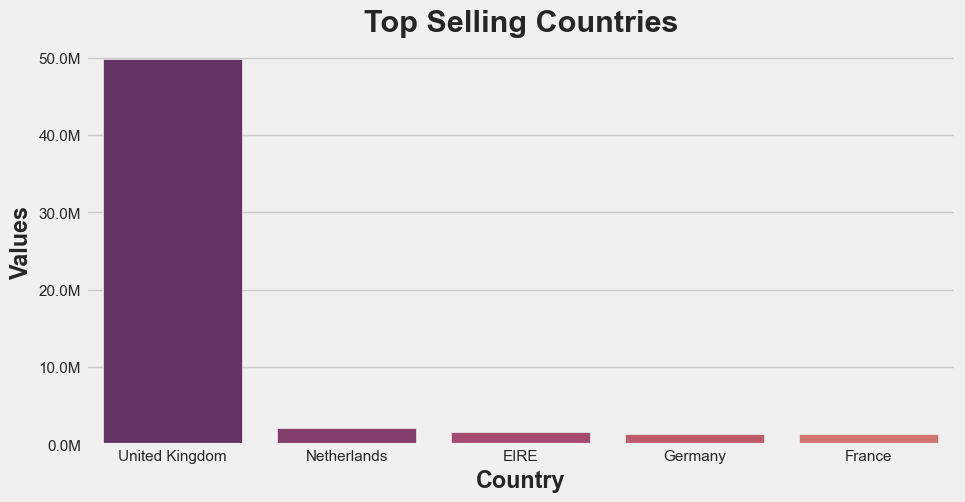

In [68]:
color = sns.color_palette("flare")
color.reverse()
def millions(y, pos):
    return '%1.1fM' % (y*1e-6)
formatter = FuncFormatter(millions)
fig, ax2 = plt.subplots(figsize=(10,5))
ax2.yaxis.set_major_formatter(formatter)
ax2.set_title('Top Selling Countries',fontsize=22, fontweight='bold')
ax2 = sns.barplot(y='Total_Cost', x='Country', data = topcountries_sales, palette= color)
ax2.set_ylabel('Values',fontweight='bold')
ax2.set_xlabel('Country',fontweight='bold')
# plt.xticks(rotation = 45)
plt.show

From the plot, it's clear UK is the top selling country amongst all other countries but this could be due to several reasons. 

High wages dictate the likelihood of having disposal income to purchase products, recent report from the World Bank shows the Netherlands is 7th on the list of top 10 European Countries with the highest salaries, with Germany taking the 8th position and Ireland is 10th on the list of the World's highest salary. Although high wages would be a good contributing factor to a high surge in total cost in the UK, it doesn't determine other factors such as marketing and advertising budgets allocated to each country as it's clear from the report, other countries with less total revenue have a much higher salary to UK. 

As stated above, another good possibility is a higher spent on marketing and advertising in the UK than in other countries. The more budget allocated towards marketing, the higher the likelihood to target more customers and achieve more sales so several factors to consider before drawing a concrete conclusion to this analysis

In [69]:
leastcountries_sales= df.groupby(['Country'], as_index=False)['Total_Cost'].sum()


In [70]:
leastcountries_sales = leastcountries_sales.sort_values('Total_Cost')


In [71]:
leastcountries_sales = leastcountries_sales[:5]
leastcountries_sales

,Country,Total_Cost
29,Saudi Arabia,903.15
2,Bahrain,3226.86
28,RSA,4259.83
4,Brazil,4652.27
21,Lebanon,5692.32


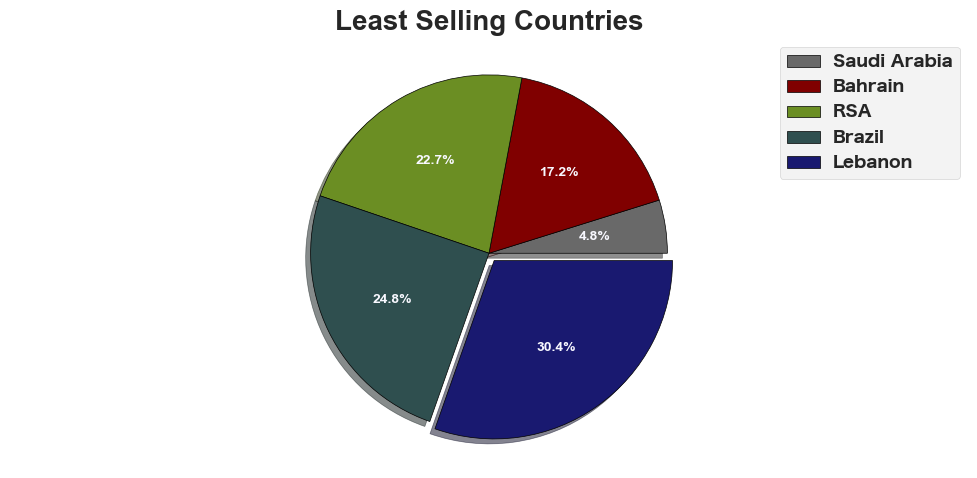

In [72]:
colours=['dimgray', 'maroon', 'olivedrab','darkslategray', 'midnightblue']
explode= [0,0,0,0,0.05]
fig, ax = plt.subplots(figsize =(10,5))
ax.axis('equal')
ax.set_title('Least Selling Countries', fontweight='bold', fontdict={'fontsize': 20})
# ax.pie(leastcountries_sales['Total_Cost'], labels = leastcountries_sales['Country'], explode=explode, shadow=True, autopct='%1.1f%%',wedgeprops={'edgecolor': 'black'})
_, _, autopcts= ax.pie(leastcountries_sales['Total_Cost'], explode=explode,shadow=True, colors=colours,autopct='%1.1f%%',wedgeprops={'edgecolor': 'black'})
fig.tight_layout()
font = font_manager.FontProperties(family= 'Hiragino Sans', style='normal',weight='bold', size=12)
plt.legend(labels = leastcountries_sales['Country'],prop=font)
fig.set_facecolor('white')
plt.setp(autopcts, **{'color':'ghostwhite', 'weight':'bold', 'fontsize':10})
plt.show()

Days with most Sales

In [73]:
DaySales = df.groupby(['Day'], as_index=False)['Total_Cost'].count()

In [74]:
DaySales=DaySales.sort_values('Total_Cost', ascending=False)
DaySales

,Day,Total_Cost
3,Sunday,101952
0,Friday,99973
4,Thursday,93433
2,Saturday,92685
1,Monday,80460
5,Wednesday,62647


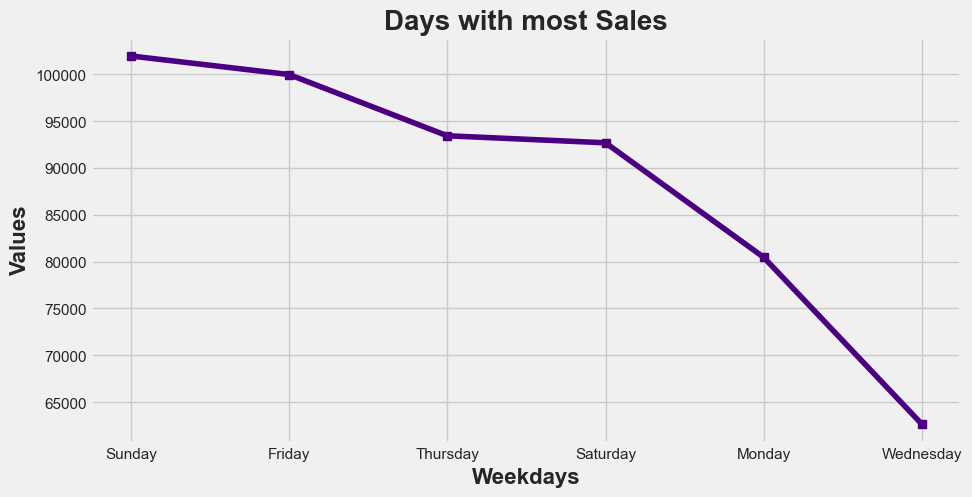

In [75]:
#plot
fig, ax5 = plt.subplots(figsize=(10,5))
ax5.set_ylabel('Values', fontsize=16, fontweight='bold')
ax5.set_xlabel('Weekdays',fontsize=16, fontweight='bold')
ax5.set_title('Days with most Sales', fontsize=20, fontweight='bold')
plt.plot(DaySales['Day'], DaySales['Total_Cost'],'-s', color='indigo')
plt.show()

The best selling day is Sunday and the lowest is wednesday.

Calculate Losses by Countries & Products

In [76]:
# copy dataframe
copy=df.copy()
# get the cancelled transactions
cancelled_transactions = copy[copy['Quantity'] < 0]

In [77]:
# get the absolute numeric value for cancelled transactions
cancelled_transactions['Quantity']=abs(cancelled_transactions['Quantity'])

/var/folders/zv/gfvqnk2x0972ygvfdf81g3z80000gn/T/ipykernel_1607/2230364649.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [78]:
# get the top 5 cancelled products
cancelled_products=cancelled_transactions.groupby(['ProductName'], as_index=False)['Quantity'].sum().sort_values('Quantity', ascending=False)
cancelled_products=cancelled_products[:5]
cancelled_products

,ProductName,Quantity
1148,Paper Craft Little Birdie,80995
994,Medium Ceramic Top Storage Jar,74494
1413,Rotating Silver Angels T-Light Hldr,9367
568,Fairy Cake Flannel Assorted Colour,3150
415,Cream Hanging Heart T-Light Holder,2578


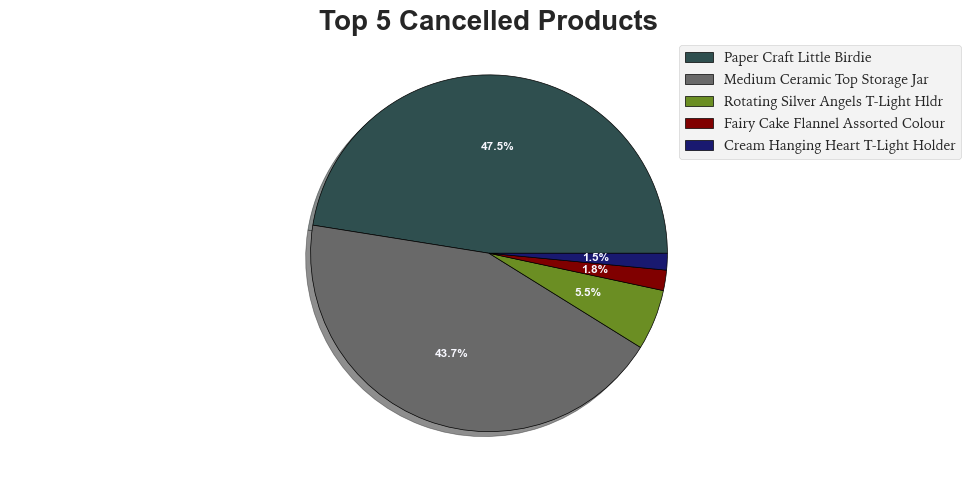

In [79]:
colours=['darkslategray','dimgray','olivedrab','maroon', 'midnightblue']
fig, ax = plt.subplots(figsize =(10,5))
ax.axis('equal')
ax.set_title('Top 5 Cancelled Products', fontdict={'fontsize': 20},fontweight='bold')
_, _, autopcts=ax.pie(cancelled_products['Quantity'],shadow=True, colors=colours,autopct='%1.1f%%',wedgeprops={'edgecolor': 'black'})
fig.tight_layout()
font = font_manager.FontProperties(family= 'Iowan Old Style', style='normal', size=10)
plt.legend(labels = cancelled_products['ProductName'],prop=font)
fig.set_facecolor('white')
plt.setp(autopcts, **{'color':'ghostwhite', 'weight':'bold', 'fontsize':8.5})
plt.show()

In [80]:
# Calculation of top 5 cancelled transactions by countries
cancelled_products_by_countries=cancelled_transactions.groupby(['Country'], as_index=False)['Quantity'].sum().sort_values('Quantity', ascending=False)
cancelled_products_by_countries=cancelled_products_by_countries[:5]
cancelled_products_by_countries

,Country,Quantity
24,United Kingdom,256321
7,EIRE,4185
11,Germany,1786
10,France,1588
23,USA,1424


/var/folders/zv/gfvqnk2x0972ygvfdf81g3z80000gn/T/ipykernel_1607/2314257259.py:13: UserWarning:

FixedFormatter should only be used together with FixedLocator



<function matplotlib.pyplot.show(close=None, block=None)>

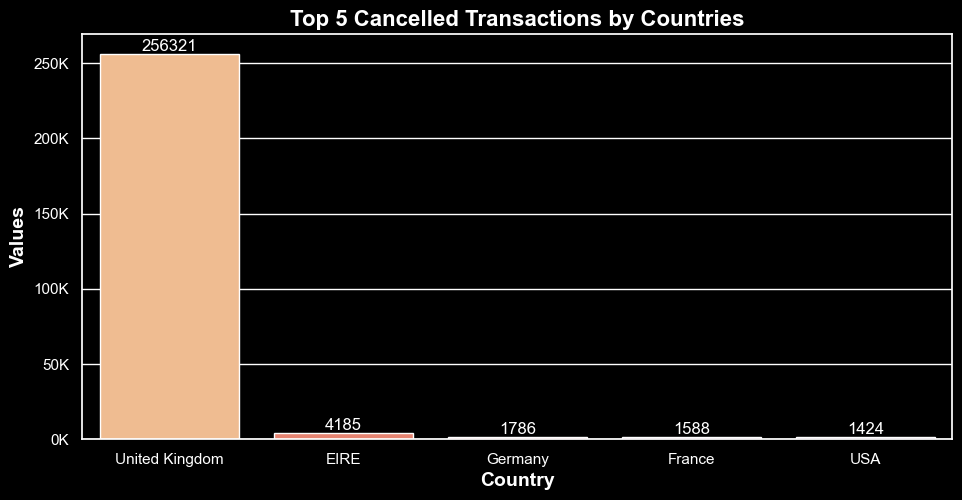

In [81]:
# plot
color = sns.color_palette("magma")
color.reverse()
sns.set(rc={'ytick.labelcolor':'white','xtick.labelcolor':'white'}) 
sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'black'})
fig, ax4 = plt.subplots(figsize=(10,5))
ax4.set_title('Top 5 Cancelled Transactions by Countries',fontsize=16, fontweight='bold',color='white')
ax4 = sns.barplot(y='Quantity', x='Country', data = cancelled_products_by_countries, palette= color)
barlabel=ax4.bar_label(ax4.containers[0],color='white')
ax4.set_ylabel('Values',fontweight='bold', color='white',fontsize=14)
ax4.set_xlabel('Country',fontweight='bold',color='white',fontsize=14)
yformat = ['{:,.0f}'.format(y) + 'K' for y in ax4.get_yticks()/1000]
ax4.set_yticklabels(yformat)
plt.show

As the business likely tailors its products to meet UK customers so it's expected UK will have a significant amount of cancelled orders, standing at 258k of total cancelled transactions.

Overall, the perfect time of the year is during end of year so adding rewards and incentives such as loyalty cards could increase more revenue. The business can prepare for a prompt winter festive marketing strategy to meet customer demands by doing research on the targeted audience, and run limited time sales. 

The business could create a tracking method to increase customer retention. The current dataset does not have records against time, adding a tracking method to track time slots from the best time customers are likely to purchase the available products to which offers are popular would not only help create a refined marketing strategy to target customers but also add more data into the equation for more analysis.

As already explained above, higher salary usually means more disposable income so increasing marketing budgets to countries with higher salaries could be a great additional tactic to increase revenue.

Research on why customers abandon their carts, certain products aren't so popular, and why UK has over 90% cancelled transactions compared to other countries should be on the card. High delivery cost, and long delivery time are usually the top reasons for order cancellation. Other reasons are likely to include; loss of interest, competitors, reviews, return policy, etc.

Introducing more responsive website features to understand customers attitude and behaviours towards sales can optimize marketing campaigns and help understand clicks, views, customer traffic, and what drives it to name a few.